In [1]:
#Spark UI
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
# sc master - running locally
sc.master

'local[*]'

In [3]:
import os
from tqdm import tqdm
import PIL.Image
import numpy as np #For numerical functions, incl. statistical.
import matplotlib.pyplot as plt #2D plotting libraryS
import cv2
import pandas as pd
from tensorflow.keras import Sequential
#from keras.utils import np_utils
from keras import utils
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
from tabulate import tabulate
#from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier

2023-09-19 19:41:38.377159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 19:41:38.421032: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 19:41:38.421481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 19:41:39.194597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## The below will not work, I cannot import any mllearn algorithms, and have not been able to find any way to resolve after much searching

#### Had been hoping to utilise distributed learning using a Keras2DML wrapper following a tutorial similar to the below, but could not progress with this.

https://towardsdatascience.com/how-to-train-your-neural-networks-in-parallel-with-keras-and-apache-spark-ea8a3f48cae6

Instead, in order to ensure that the CNN model could run, the image sizes were reduced.

In [4]:
#from systemml.mllearn import Keras2DML

In [5]:
def assign_label(img,group):
    return group

X = []
y = []

def make_data(group,directory):
    print(group)
    print(directory)
    for img in tqdm(os.listdir(directory)):
        label=assign_label(img,group)
        path = os.path.join(directory,img)
        print(path)
        img = PIL.Image.open(path)
        #img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        
        X.append(np.array(img))
        y.append(str(label))

# Classifying between Mayfly genera

In [6]:
mayfly_groups = {'Ecdyonurus':0,'Seratella':1,'Baetis':2}

In [7]:
Ecdyonurus_directory = os.getcwd() + '/Species_images/Mayflies_Ephemeroptera/'
Seratella_directory = os.getcwd() + '/Species_images/Baetis_mayfly'
Baetis_directory = os.getcwd() + '/Species_images/Seratella_mayflies'

In [8]:
make_data(mayfly_groups.get('Ecdyonurus'), Ecdyonurus_directory)
make_data(mayfly_groups.get('Seratella'), Seratella_directory)
make_data(mayfly_groups.get('Baetis'), Baetis_directory)

0
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/


100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 1056.82it/s]


/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/Ecdyonurusdispar9.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/Ecdyonurusdispar7.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/Ecdyonurus dispar 10.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/Ecdyonurusdispar4.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/Ecdyonurusdispar8.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/Ecdyonurusdispar2.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Mayflies_Ephemeroptera/Ecdyonurusdispar5.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_f

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 204.22it/s]


/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetistricaudatus.jpg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetis2.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetisfuscatus.jpg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetisniger3.jpg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetis4.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetis3.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetisbicaudatus.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Baetis_mayfly/Baetisrhodani3.jpg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 243.28it/s]

/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies/Seratellaignita3.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies/Seratellaignita5.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies/Seratellaignita2.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies/Seratellaignita.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies/Seratellaignita9.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies/Seratellaignita7.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies/Seratellaignita6.jpeg
/home/hduser/Dropbox/M.Sc. Data Analytics/CAs/CA3/Git_submission_folder/Species_images/Seratella_mayflies

In [9]:
X = np.array(X)
X /= 255
X.shape

/tmp/ipykernel_14040/2660155455.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


(30,)

In [10]:
min_width = 0
min_height = 0

for x in range(len(X)):
    min_width = X[x].shape[1]
    min_height = X[x].shape[0]
    if X[x].shape[1] < min_width:
        min_width = X[x].shape[1]
    if X[x].shape[0] < min_height:
        min_height = X[x].shape[0]

In [11]:
#resize the images to feed the model
#The images had to be made 250 x 250 to ensure that the CNN model could build and run
for x in range(len(X)):
    X[x] = cv2.resize(X[x], (min(min_width, 250), min(min_height, 250)))

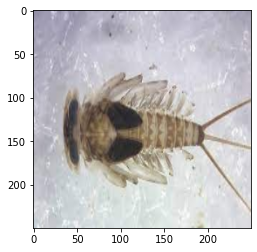

In [12]:
plt.imshow(X[3])

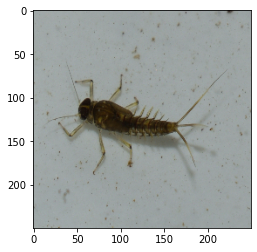

In [13]:
plt.imshow(X[15])

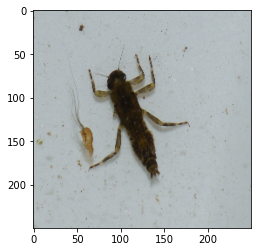

In [14]:
plt.imshow(X[29])

In [15]:
images = []
for x in range(len(X)):
    images.append(X[x])

In [16]:
images = np.array(images) 

In [17]:
images.shape

(30, 250, 250, 3)

In [18]:
images[4].shape, images[7].shape

((250, 250, 3), (250, 250, 3))

In [19]:
images = images.astype('float32')

In [20]:
#Convert the list to an array:
y = np.array(y)

#The number of species = 3. One hot encode these:
n_classes = 3
print("Shape before one-hot encoding: ", y.shape)
y = utils.to_categorical(y, n_classes)
#y = np_utils.to_categorical(y, n_classes)
print("Shape after one-hot encoding: ", y.shape)

Shape before one-hot encoding:  (30,)
Shape after one-hot encoding:  (30, 3)


In [21]:
images = tf.convert_to_tensor(images) 

2023-09-19 19:41:40.548575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 19:41:40.549139: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
#Defining the model
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',input_shape=(X[0].shape[0],X[0].shape[1],3)))
model.add(MaxPool2D(pool_size=(1,1))) #A filter that takes the max pixel value that falls within it
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu')) #One layer neural network
# output layer (3 nodes because there are 3 classes)
model.add(Dense(3, activation='softmax')) #Softmax because it is a classification problem

2023-09-19 19:41:40.604457: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 615040000 exceeds 10% of free system memory.
2023-09-19 19:41:40.743716: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 615040000 exceeds 10% of free system memory.
2023-09-19 19:41:40.884990: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 615040000 exceeds 10% of free system memory.


In [23]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 25)      700       
                                                                 
 max_pooling2d (MaxPooling2  (None, 248, 248, 25)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1537600)           0         
                                                                 
 dense (Dense)               (None, 100)               153760100 
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 153761103 (586.55 MB)
Trainable params: 153761103 (586.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [25]:
# This had to be abandoned, as above because KERAS2DML could not be imported, with no solution apparent.
epochs = 5
batch_size = 10
samples = 30
#max_iter = int(epochs*math.ceil(samples/batch_size))
#sysml_model.fit(images, y)

In [26]:
# training the model

#low batch size because there are so few images
model.fit(images, y, batch_size=5, epochs=10, validation_data=(images, y))

Epoch 1/10


2023-09-19 19:41:41.261239: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 615040000 exceeds 10% of free system memory.
2023-09-19 19:41:41.364453: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 615040000 exceeds 10% of free system memory.


6/6 [==============================] - 14s 2s/step - loss: 215.0398 - accuracy: 0.3000 - val_loss: 27.4990 - val_accuracy: 0.3667
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 29.6592 - accuracy: 0.3667 - val_loss: 1.5814 - val_accuracy: 0.4333
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 9.6542 - accuracy: 0.3333 - val_loss: 10.1789 - val_accuracy: 0.4000
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 5.4286 - accuracy: 0.3667 - val_loss: 3.1661 - val_accuracy: 0.3333
Epoch 5/10
6/6 [==============================] - 13s 2s/step - loss: 1.7734 - accuracy: 0.5333 - val_loss: 0.6025 - val_accuracy: 0.7000
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 0.3277 - accuracy: 0.8667 - val_loss: 0.1514 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 13s 2s/step - loss: 0.1413 - accuracy: 1.0000 - val_loss: 0.0690 - val_accuracy: 1.0000
Epoch 8/10
6/6 [========================

|  Batch size  |  Epochs  |  # Filters  |  Kernel size  |  Accuracy achieved  |  Loss  |
|--------------|----------|-------------|---------------|---------------------|--------|
|      3       |    10    |     10      |     3 x 3     |         77%         |  1.100 |
|      3       |    10    |     25      |     3 x 3     |        100%         |  0.071 |
|     10       |    10    |     25      |     3 x 3     |         50%         | 11.990 |
|      5       |    10    |     25      |     3 x 3     |        100%         |  0.036 |